In [1]:
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

# Read nodes and edges from CSV files
nodes = pd.read_csv('synthetic_nodes_capacity.csv')
edges = pd.read_csv('synthetic_edges_latency.csv')

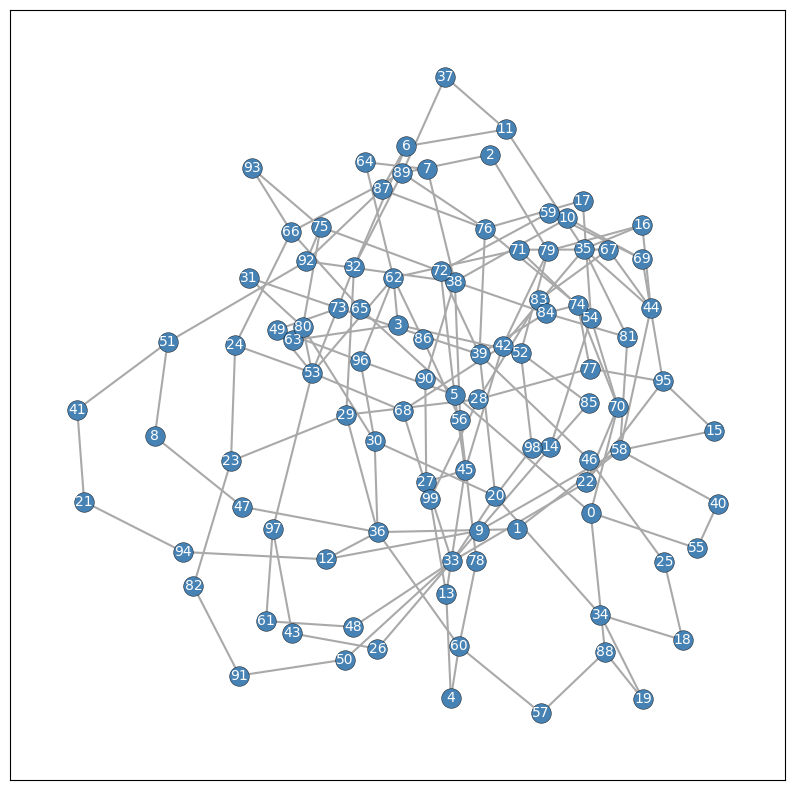

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Criar o grafo G
G = nx.Graph()

# Adicionar nós com atributos
for index, row in nodes.iterrows():
    G.add_node(
        int(row['id']),
        pos=(row['x'], row['y']),
        cpu=row['cpu'],
        memory=row['memory'],
        storage=row['storage'],
        bandwidth=row['bandwidth']
    )

# Adicionar arestas com atributos
for index, row in edges.iterrows():
    G.add_edge(
        int(row['source']),
        int(row['target']),
        bandwidth=row['bandwidth'],
        latency=row['latency']
    )

# Definir df_nodes
df_nodes = nodes.set_index('id')

plt.figure(figsize=(10, 10))

# Inverter a posição dos nós (invertendo o eixo y)
pos = {node: (df_nodes['x'][node], -df_nodes['y'][node]) for node in G.nodes()}

# Plotar os nós
nx.draw_networkx_nodes(
    G, pos,
    node_size=200,  # Aumentar tamanho dos nós
    node_color='steelblue',  # Azul escuro para representar computação na névoa
    edgecolors='black',  # Contornos pretos
    linewidths=0.3  # Define a espessura do contorno (mais fino)
)

# Adicionar rótulos nos nós
nx.draw_networkx_labels(
    G, pos,
    font_size=10,  # Aumentar tamanho da fonte
    font_color='white',  # Rótulos em branco para contraste
    font_family='sans-serif'
)

# Plotar arestas
nx.draw_networkx_edges(
    G, pos,
    width=1.5,  # Aumentar a largura das arestas
    edge_color='darkgray'  # Cor cinza escuro para conexões
)

# Remover os eixos
# plt.axis('off')
# plt.title("Fog and Edge Computing Network", fontsize=14, fontweight='bold')

# Salvar o gráfico em svg
# plt.savefig('synthetic_fog_edge_network.svg')

plt.show()

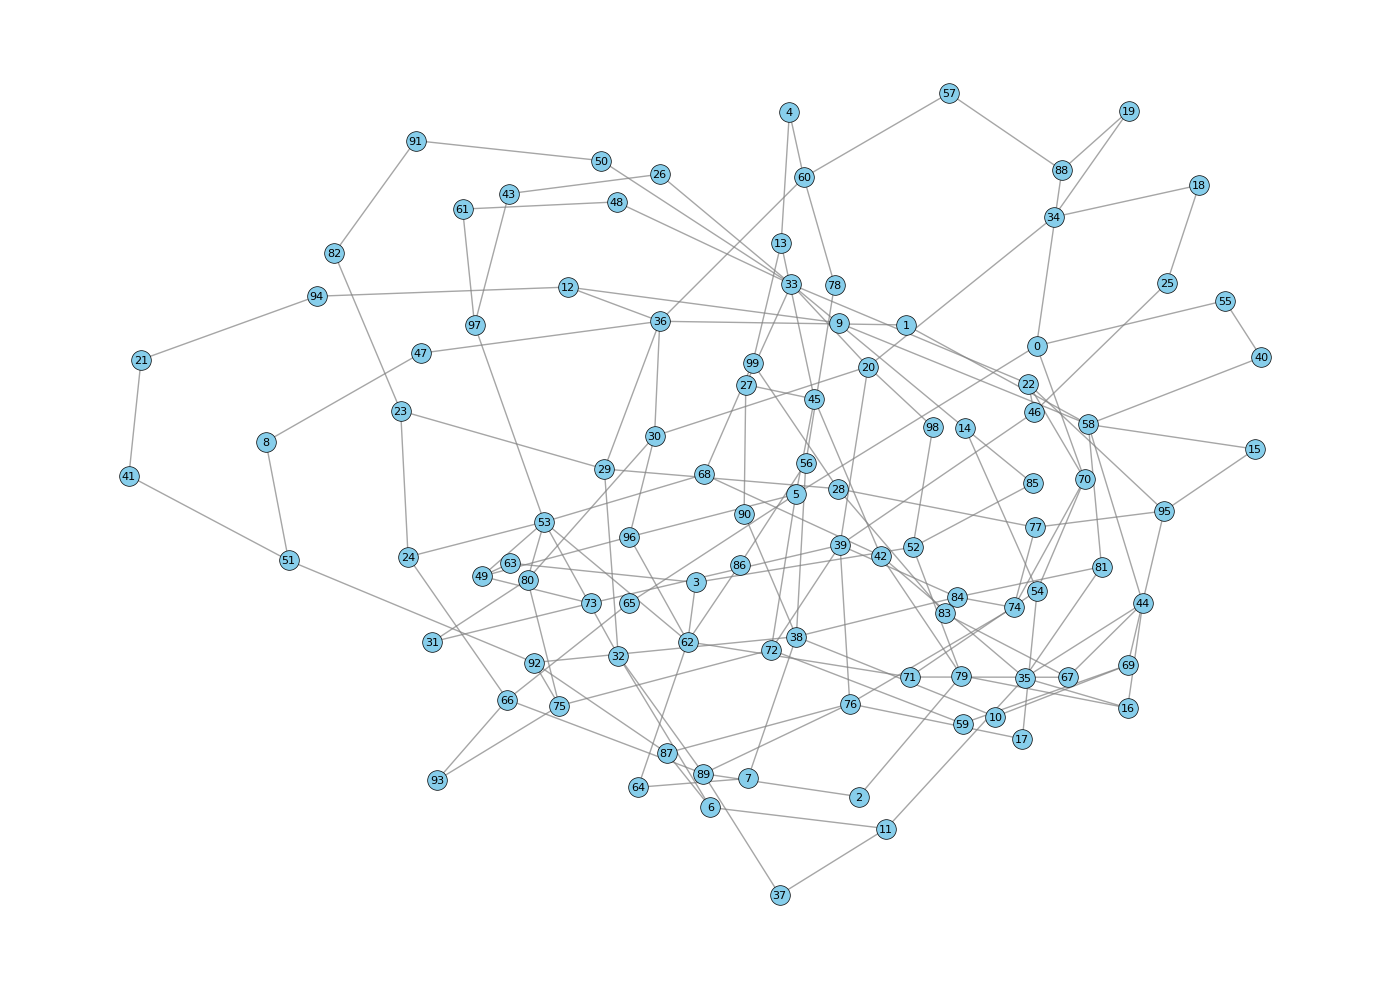

In [3]:
# Visualizar o grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  # Usar layout de mola para melhor distribuição (fixando a seed)

# Nós
nx.draw_networkx_nodes(
    G, pos,
    node_size=200,
    node_color='skyblue',
    edgecolors='black',
    linewidths=0.5
)

# Arestas
nx.draw_networkx_edges(
    G, pos,
    width=1,
    alpha=0.7,
    edge_color='gray'
)

# Rótulos dos nós (opcional, para não poluir a visualização)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Configurações finais
# plt.title("Topologia eHDDP com 100 Nós (Sem Nós Isolados, 2+ Arestas por Nó)", fontsize=16)
plt.axis('off')
plt.tight_layout()

plt.savefig('synthetic_fog_edge_network.svg')

plt.show()